<a href="https://colab.research.google.com/github/DonghaeSuh/NLP_tensorflow2/blob/main/6_ChatBot/Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 작업 공간 접근

In [ ]:
ls

In [ ]:
cd drive/MyDrive/Colab Notebooks/

In [ ]:
ls

EDA.ipynb  Preprocess.ipynb  preprocess.py  preprocess_py.py  __pycache__/


### Konlpy 설치

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

### 학습 데이터 마련 (data_in 폴더안에 ChatBotData.csv를 넣어준다.)

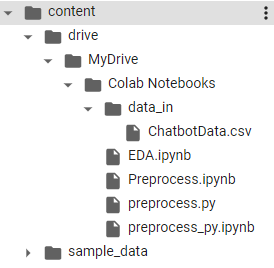

### Preprocess.ipynb

In [ ]:
from preprocess import *

In [ ]:
PATH = 'data_in/ChatbotData.csv'
VOCAB_PATH = 'data_in/vocabulary.txt'

In [ ]:
inputs, outputs = load_data(PATH)

In [ ]:
char2idx, idx2char, vocab_size = load_vocabulary(PATH, VOCAB_PATH, tokenize_as_morph=False)

In [ ]:
index_inputs, input_seq_len = enc_processing(inputs, char2idx, tokenize_as_morph=False)
index_outputs, output_seq_len = dec_output_processing(outputs, char2idx, tokenize_as_morph=False)
index_targets = dec_target_processing(outputs, char2idx, tokenize_as_morph=False)

### 사전 형태로 필요한 도구들 저장해놓음

In [ ]:
data_configs = {}
data_configs['char2idx'] = char2idx
data_configs['idx2char'] = idx2char
data_configs['vocab_size'] = vocab_size
data_configs['pad_symbol'] = PAD
data_configs['std_symbol'] = STD
data_configs['end_symbol'] = END
data_configs['unk_symbol'] = UNK

### data_in 폴더에 전처리된 데이터들 저장하기

In [ ]:
DATA_IN_PATH = './data_in/'
TRAIN_INPUTS = 'train_inputs.npy'
TRAIN_OUTPUTS = 'train_outputs.npy'
TRAIN_TARGETS = 'train_targets.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_INPUTS, 'wb'), index_inputs)
np.save(open(DATA_IN_PATH + TRAIN_OUTPUTS , 'wb'), index_outputs)
np.save(open(DATA_IN_PATH + TRAIN_TARGETS , 'wb'), index_targets)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))